In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [4]:
#Checking Null Values in the dataset
for col in X_train.columns:
    X_train_null_count = X_train[col].isnull().sum()

for col in y_train.columns:
    y_train_null_count = y_train[col].isnull().sum()

for col in X_test.columns:
    X_test_null_count = X_test[col].isnull().sum()

for col in y_test.columns:
    y_test_null_count = y_test[col].isnull().sum()
print("========================================")
print("=           Null Values Count          =")
print("========================================")
print("= Null Values in X_train :", X_train_null_count)
print("= Null Values in y_train :", y_train_null_count)
print("= Null Values in X_test  :", X_test_null_count)
print("= Null Values in y_test  :", y_test_null_count)
print("========================================")

=           Null Values Count          =
= Null Values in X_train : 0
= Null Values in y_train : 0
= Null Values in X_test  : 0
= Null Values in y_test  : 0


In [5]:
#Checking for datatypes of data available in the dataset
print("========================================")
print("Data types of X_train dataframe")
print(X_train.dtypes.value_counts())
print("========================================")
print("Data types of y_train dataframe")
print(y_train.dtypes.value_counts())
print("========================================")
print("Data types of X_test dataframe")
print(X_test.dtypes.value_counts())
print("========================================")
print("Data types of y_test dataframe")
print(y_test.dtypes.value_counts())
print("========================================")

Data types of X_train dataframe
float64    2304
Name: count, dtype: int64
Data types of y_train dataframe
int64    1
Name: count, dtype: int64
Data types of X_test dataframe
float64    2304
Name: count, dtype: int64
Data types of y_test dataframe
int64    1
Name: count, dtype: int64


In [6]:
#Converting them to numpy arrays
X_train_new = np.array(X_train)
X_test_new = np.array(X_test)
y_train_new = np.array(y_train)
y_test_new = np.array(y_test)

In [7]:
#Reshaping the training and test dataset
X_train_reshape = X_train_new.reshape(len(X_train_new),48,48)
X_test_reshape = X_test_new.reshape(len(X_test_new),48,48)

In [8]:
#Printing the shapes of the training
print("========================================")
print("=    Shape of dataset after reshape    =")
print("========================================")
print("Shape of X_train is  :", X_train_reshape.shape)
print("Shape of X_test is   :", X_test_reshape.shape)
print("========================================")

=    Shape of dataset after reshape    =
Shape of X_train is  : (9690, 48, 48)
Shape of X_test is   : (3090, 48, 48)


In [9]:
#Checking for Min and Max Values so that we can search for outliers
print("===============================================")
print("=            Min and Max for X_train          =")
print("===============================================")
print("Max value in X_train   :", np.max(X_train))
print("Min value in X_train   :", np.min(X_train))
print("===============================================")
print("=            Min and Max for X_test           =")
print("===============================================")
print("Max value in X_test    :", np.max(X_test))
print("Min value in X_test    :", np.min(X_test))
print("===============================================")
print("=            Min and Max for y_train          =")
print("===============================================")
print("Max value in y_train   :", np.max(y_train))
print("Min value in y_train   :", np.min(y_train))
print("===============================================")
print("=            Min and Max for y_test           =")
print("===============================================")
print("Max value in y_test    :", np.max(y_test))
print("Min value in y_test    :", np.min(y_test))
print("===============================================")

=            Min and Max for X_train          =
Max value in X_train   : 255.0
Min value in X_train   : 3.0
=            Min and Max for X_test           =
Max value in X_test    : 255.0
Min value in X_test    : 4.0
=            Min and Max for y_train          =
Max value in y_train   : 9
Min value in y_train   : 0
=            Min and Max for y_test           =
Max value in y_test    : 9
Min value in y_test    : 0


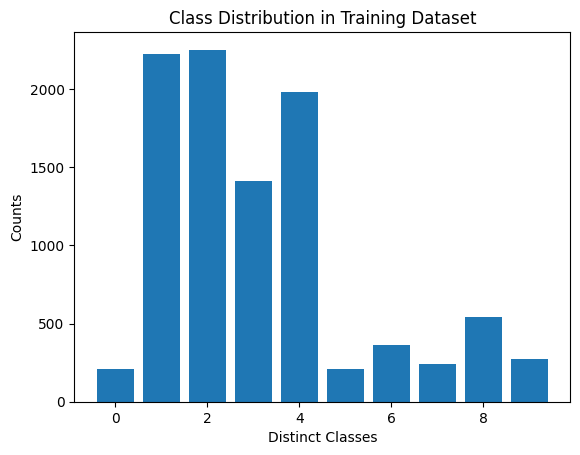

In [10]:
#Calulating the counts of records for each class in the training dataset

#Getting unique values and the counts
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
#Plotting the graph
plt.bar(unique_values_train, counts_train)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Training Dataset')
plt.show()

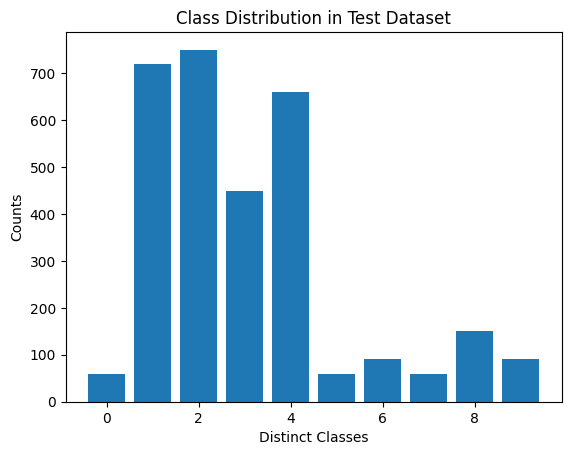

In [11]:
#Calulating the counts of records for each class in the test dataset

#Getting unique values and the counts
unique_values_test, counts_test = np.unique(y_test, return_counts=True)
total_count = len(y_test)
#Plotting the graph
plt.bar(unique_values_test, counts_test)
plt.xlabel('Distinct Classes')
plt.ylabel('Counts')
plt.title('Class Distribution in Test Dataset')
plt.show()

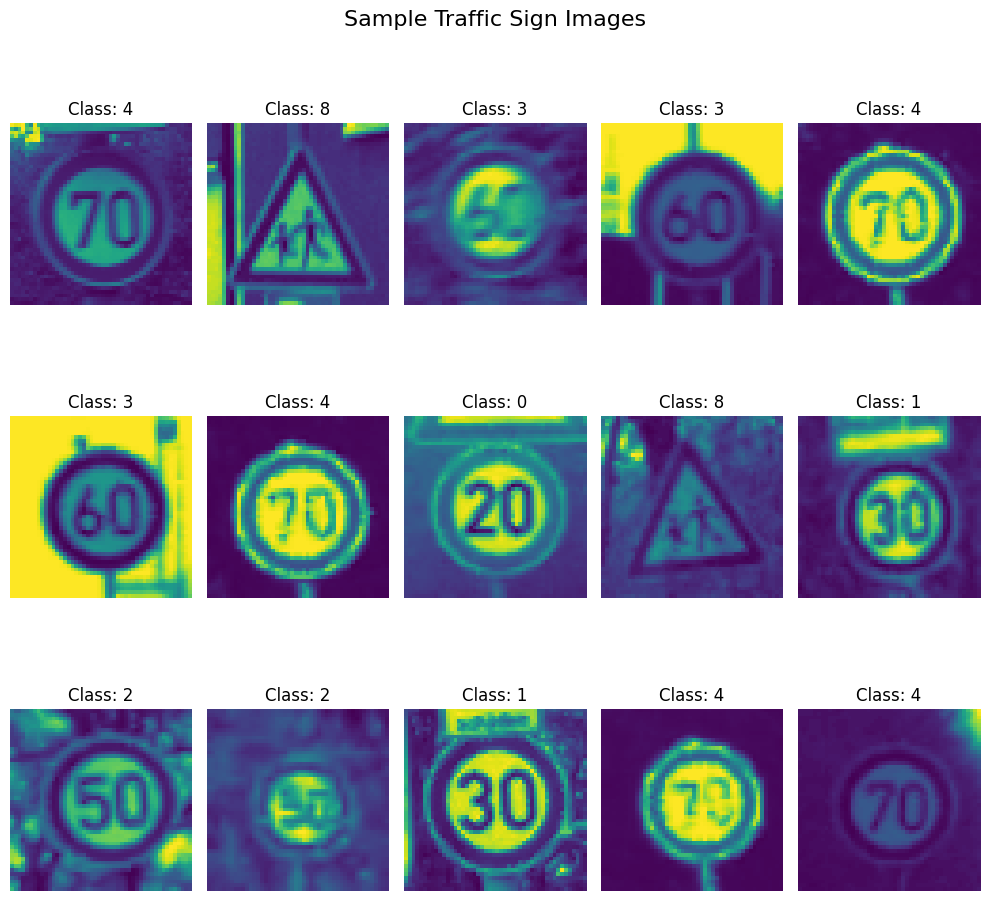

In [12]:
#Number of images to print
num_samples = 15
# Taking random samples from the training dataset
sample_indices = np.random.randint(0, len(X_train_reshape), num_samples)

# Plotting the sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 10))

#For loop for getting the class of the images plotted
for i, ax in enumerate(axes.flatten()):
    if i < num_samples:
        image = X_train_reshape[sample_indices[i]]
        img_class = y_train_new[sample_indices[i]]
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f"Class: {img_class[0]}", fontsize=12)

plt.suptitle('Sample Traffic Sign Images', fontsize=16)
plt.tight_layout()
plt.show()